In [1]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
raw = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/BostonHousing.csv')
raw.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [4]:
df = raw.copy()

In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
# 독립변수, 종속변수(지도학습 : 가격(y) 존재하기 때문)

y = df['medv']
x = df.drop(['medv'], axis=1)

print(x)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [9]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [10]:
# 훈련용 / 테스트 데이터 분리

x_train, x_test, y_train, y_test =\
 train_test_split(x,y, test_size= 0.3, random_state=42)

In [11]:
# 모델링 (선형회귀 분석)

lr = LinearRegression()

In [12]:
# 모델 훈련 (반드시, 훈련용 데이터로 >> 모델 구축)
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
# 모델 성능 평가(테스트 데이터로 예측 수행)
# >> 예측 결과 y_pred 구하기

y_pred = lr.predict(x_test)

In [14]:
# 회귀분석 평가 지표 (mse, rmse, mae/ 결정계수 r2_score)

mse = mean_squared_error(y_test, y_pred)
# y_test : 실 데이터, y_pred : 예측 데이터
RMSE = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred) # RMSE (평균제곱근오차) 계산
print('MSE: %0.2f' %mse)        # 평균제곱오차
print('RMSE: %0.2f' %RMSE)      # 평균
print('MAE: %0.2f' %mae)        # 평균절대오차 출력

MSE: 21.52
RMSE: 4.64
MAE: 3.16


In [15]:
r2 = round(r2_score(y_test, y_pred),2)
print('결정계수 :', r2)
# 결정계수 (설명력)

결정계수 : 0.71


In [16]:
print('y절편 :', round(lr.intercept_, 2))

y절편 : 31.63


In [17]:
print('회귀계수 값: ' ,np.round(lr.coef_, 2))

회귀계수 값:  [-1.300e-01  4.000e-02  5.000e-02  3.120e+00 -1.542e+01  4.060e+00
 -1.000e-02 -1.390e+00  2.400e-01 -1.000e-02 -9.100e-01  1.000e-02
 -5.500e-01]


In [18]:
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [19]:
# y_pred('가격') = -1.300e-01  crim +  4.000e-02 zn + ...... + 31.63(y절편)

In [20]:
pd.Series(data=np.round(lr.coef_,2), index=x.columns)

crim       -0.13
zn          0.04
indus       0.05
chas        3.12
nox       -15.42
rm          4.06
age        -0.01
dis        -1.39
rad         0.24
tax        -0.01
ptratio    -0.91
b           0.01
lstat      -0.55
dtype: float64

In [21]:
coef = pd.Series(data=np.round(lr.coef_,2), index=x.columns)
coef.sort_values(ascending=False) # 내림차순 정렬

rm          4.06
chas        3.12
rad         0.24
indus       0.05
zn          0.04
b           0.01
age        -0.01
tax        -0.01
crim       -0.13
lstat      -0.55
ptratio    -0.91
dis        -1.39
nox       -15.42
dtype: float64

In [22]:
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

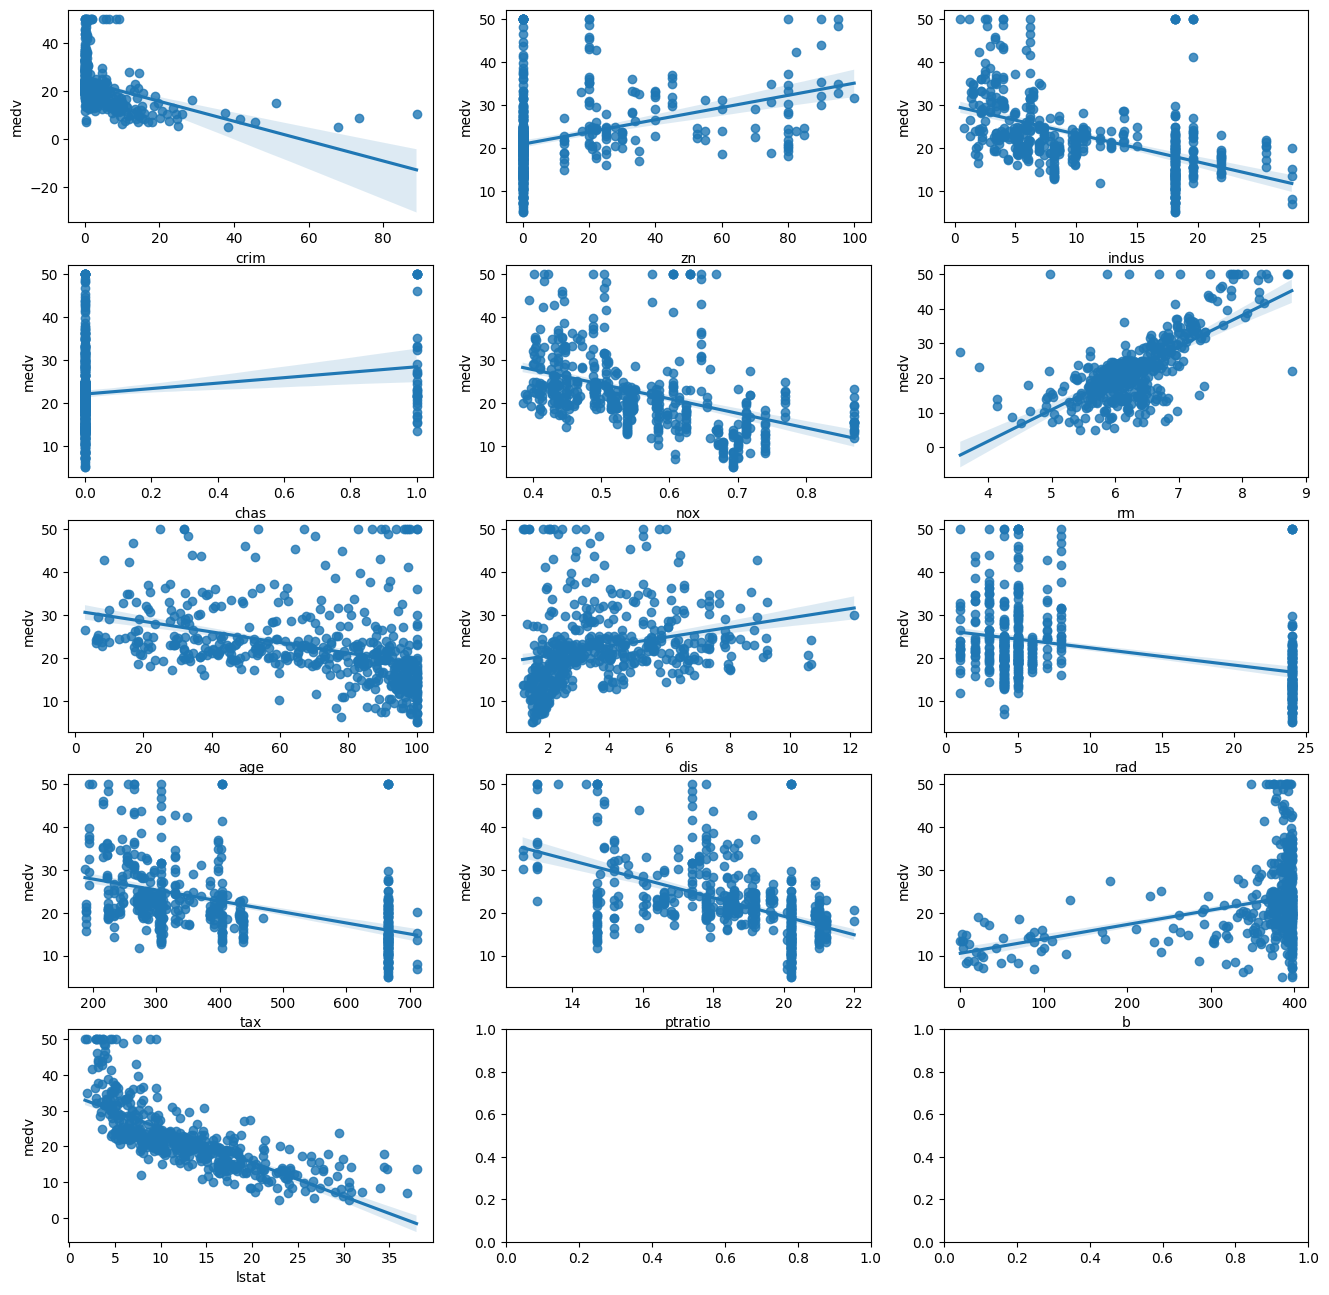

In [23]:
# 데이터 시각화

import seaborn as sns

fig,ax = plt.subplots(figsize=(16,16), ncols = 3, nrows= 5)

x_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

for i , feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='medv', data=df, ax=ax[row][col])

plt.show()

In [24]:
path = '/content/drive/MyDrive/멀티캠퍼스/auto_mpg.csv'

In [25]:
%cd /content/drive/MyDrive/멀티캠퍼스

/content/drive/MyDrive/멀티캠퍼스


In [26]:
pd.read_csv('./auto_mpg.csv')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [27]:
raw = pd.read_csv('./auto_mpg.csv')
auto = raw.copy()

In [28]:
auto.shape

(398, 9)

In [29]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [30]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [33]:
auto.drop(['car_name', 'origin', 'horsepower'], axis=1 , inplace=True)

In [34]:
auto.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
# 독립변수(x), 종속변수(y) 구분

y = auto['mpg']                 # mile_per gallon
x = auto.drop(['mpg'], axis = 1)

In [37]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [38]:
x

,cylinders,displacement,weight,acceleration,model_year
0,8,307.0,3504,12.0,70
1,8,350.0,3693,11.5,70
2,8,318.0,3436,11.0,70
3,8,304.0,3433,12.0,70
4,8,302.0,3449,10.5,70
...,...,...,...,...,...
393,4,140.0,2790,15.6,82
394,4,97.0,2130,24.6,82
395,4,135.0,2295,11.6,82
396,4,120.0,2625,18.6,82


In [39]:
# 훈련용 데이터 / 평가용 데이터 분할
x_train, x_test, y_train, y_test = \
train_test_split(x, y ,test_size =0.3 , random_state=42)

### 모델링 : 선형회귀분석

In [40]:
# 모델 생성
lr = LinearRegression()

# 모델 훈련
lr.fit(x_train, y_train)

# 예측
y_pred = lr.predict(x_test)
y_pred

array([31.52848751, 30.78891693, 21.49371422, 16.95818177, 12.74346605,
       26.27542683, 28.95160986,  8.57404465, 17.70905303, 22.76276182,
       12.06270523, 34.98678288, 26.75925599, 14.13190304, 24.77686404,
        5.90211418, 30.98096323, 24.14563349, 15.32246178, 35.14651783,
       23.57425408, 19.77317246, 29.00746195, 30.34318909, 15.02902547,
       34.58776778, 25.91010457, 25.7238098 , 21.9802649 ,  7.78561225,
       29.38187731, 34.83529534, 19.72937968, 24.95317633, 33.18325769,
       11.66203721, 24.62355093, 21.9712633 , 12.62192264, 27.07517458,
       27.70206864, 27.40545058, 20.56129032,  7.63958438, 23.35334483,
       33.52020372, 26.61655631, 24.56978886, 22.93507616, 27.88326319,
       23.42668416, 32.59073851, 31.34539081, 10.15335707, 29.09848666,
        9.01439141, 19.08865732, 28.34075589, 24.10748781, 20.80566575,
       16.0507234 , 30.74500303, 24.93471638, 20.63643734, 21.7194628 ,
       24.37761768, 25.88257121, 33.72470041, 29.43020136, 12.88

In [41]:
y_test

198    33.0
396    28.0
33     19.0
208    13.0
93     14.0
       ... 
60     20.0
79     26.0
284    20.6
304    37.3
277    16.2
Name: mpg, Length: 120, dtype: float64

In [45]:
# 모델 평가
# mse, rmse, mae
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE : ', np.round(mse,2)) # MSE(Mean Squared Error, 평균 제곱 오차)
print("RMSE : ", np.round(rmse,2)) # RMSE(Root Mean Squared Error, 평균 제곱근 오차)
print('MAE : ', np.round(mae,2))  # MAE(Mean Absolute Error, 평균 절대 오차)

MSE :  9.93
RMSE :  3.15
MAE :  2.56


In [46]:
print(' y 절편 : ', np.round(lr.intercept_, 2))
print('회귀계수 값 : ', np.round(lr.coef_, 2))

 y 절편 :  -18.63
회귀계수 값 :  [ 0.24 -0.01 -0.01  0.07  0.79]


In [47]:
pd.Series(data=np.round(lr.coef_,2), index=x.columns)

cylinders       0.24
displacement   -0.01
weight         -0.01
acceleration    0.07
model_year      0.79
dtype: float64

In [49]:
coef = pd.Series(data=np.round(lr.coef_,2), index=x.columns)

coef.sort_values(ascending=False) # 내림차순 정렬

model_year      0.79
cylinders       0.24
acceleration    0.07
displacement   -0.01
weight         -0.01
dtype: float64

In [ ]:
# 회귀식
# y_pred(y_hat) = 0.79 (model_year) + 0.24(cylinders) +......+(-18.63)

In [50]:
coef.sort_values(ascending=False).to_frame('coef')

,coef
model_year,0.79
cylinders,0.24
acceleration,0.07
displacement,-0.01
weight,-0.01


In [51]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'weight', 'acceleration',
       'model_year'],
      dtype='object')

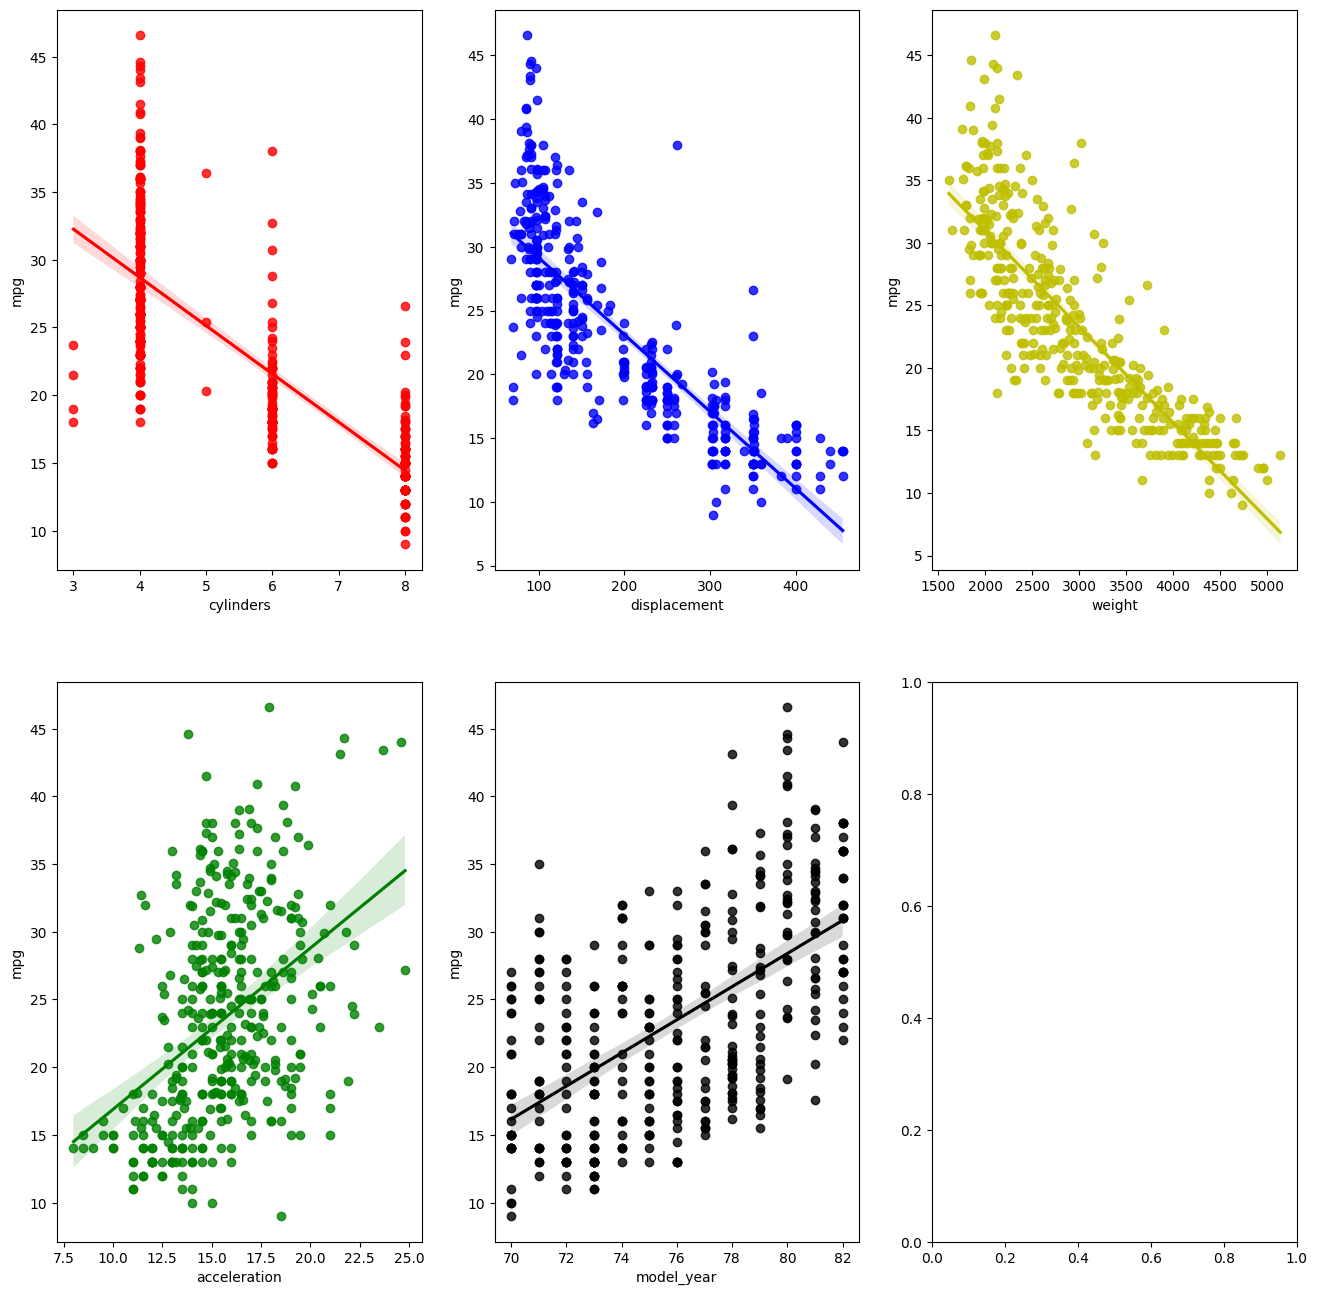

In [53]:
# 데이터 시각화

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,16), ncols=3, nrows=2)

x_features = ['cylinders', 'displacement', 'weight', 'acceleration', 'model_year']
plot_color = ['r', 'b' , 'y', 'g', 'k']

for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i % 3
    sns.regplot(x=feature, y = 'mpg', data=auto, ax=ax[row][col], color=plot_color[i])

### 자동차 연비 예측 프로그램

In [58]:
print('연비를 예측하고 싶은 차의 정보를 입력해 주세요.')

실린더 = int(input('cylinders : '))
배기량 = int(input('displacement : '))
차량무게 = int(input('weight : '))
가속도 = int(input('acceleration : '))
차량연식 = int(input('model_year : '))

연비를 예측하고 싶은 차의 정보를 입력해 주세요.
cylinders : 8
displacement : 350
weight : 3200
acceleration : 5
model_year : 99


방식1

In [61]:
input_data = pd.DataFrame({
    'cylinders': [실린더],
    'displacement': [배기량],
    'weight': [차량무게],
    'acceleration': [가속도],
    'model_year': [차량연식]
})

예측된 연비: 39.19787118788663


In [62]:
mpt_predict = lr.predict(input_data)
print('예측된 연비:', mpt_predict[0])

예측된 연비: 39.19787118788663


방식2

In [65]:
def pred_car_mpg():
  실린더 = int(input('cylinders: '))
  배기량 = int(input('displacement: '))
  차량무게 = int(input('weight: '))
  가속도 = int(input('acceleration: '))
  차량연식 = int(input('model_year: '))
  array=[[실린더,배기량,차량무게,가속도,차량연식]]
  return array
predicted_mpg= lr.predict(pred_car_mpg())
print(predicted_mpg)

cylinders: 8
displacement: 250
weight: 3200
acceleration: 20
model_year: 99
[40.84904433]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


방식3

In [66]:
print('연비를 예측하고 싶은 차의 정보를 입력해 주세요')
def pred_car_mpg():
    실린더 = int(input('cylinders: '))
    배기량 = int(input('displacement: '))
    차량무게 = int(input('weight: '))
    가속도 = int(input('acceleration: '))
    차량연식 = int(input('model_year: '))
    car_info = {
        'cylinders': 실린더,
        'displacement' : 배기량,
        'weight' : 차량무게,
        'acceleration' : 가속도,
        'model_year' : 차량연식}
    return car_info

car_info = pred_car_mpg()
data = []

for k in car_info:
  data.append(car_info[k])
predicted_mpg = lr.predict([data])
print(f'예상 연비(MPG): {predicted_mpg}')

연비를 예측하고 싶은 차의 정보를 입력해 주세요
cylinders: 8
displacement: 350
weight: 3200
acceleration: 20
model_year: 99
예상 연비(MPG): [40.30767159]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


방식 4

In [67]:
def pred_car_mpg():
  실린더 = int(input('cylinders: '))
  배기량 = int(input('displacement: '))
  차량무게 = int(input('weight: '))
  가속도 = int(input('acceleration: '))
  차량연식 = int(input('model_year: '))
  array=[[실린더,배기량,차량무게,가속도,차량연식]]
  return array

predicted_mpg= lr.predict(pred_car_mpg())
print(predicted_mpg)

cylinders: 8
displacement: 350
weight: 3200
acceleration: 20
model_year: 99
[40.30767159]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


방식 5

In [69]:
import pandas as pd

def get_car_info():
    features = ['cylinders', 'displacement', 'weight', 'acceleration', 'model_year']
    return [int(input(f'{feature}: ')) for feature in features]

def predict_mpg(lr):
    print('연비를 예측하고 싶은 차의 정보를 입력해 주세요.')
    car_info = get_car_info()

    input_data = pd.DataFrame([car_info], columns=['cylinders', 'displacement', 'weight', 'acceleration', 'model_year'])

    mpg_predict = lr.predict(input_data)
    print('예측된 연비:', round(mpg_predict[0],2))

predict_mpg(lr)

연비를 예측하고 싶은 차의 정보를 입력해 주세요.
cylinders: 8
displacement: 350
weight: 3200
acceleration: 20
model_year: 99
예측된 연비: 40.31
